<a href="https://colab.research.google.com/github/SarahSouzaPontes/-superheropowers/blob/main/desafioAlelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
import warnings
import seaborn as sns
import imblearn
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
super_heros = "/content/heroes_information.csv"
super_heros_powers = "/content/super_hero_powers.csv"

df_super_heros = pd.read_csv(super_heros, index_col=0)

### Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações.
Execute um método de cluster não supervisionado usando o número de clusters que você
julgar mais apropriado.

1. Qual algoritmo você escolheu e por quê?
2. Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia
de recursos (seleção) que você executou.

In [ ]:
df_super_heros_powers = pd.read_csv(super_heros_powers)
df_super_heros_powers.rename(columns={"hero_names":"name"}, inplace=True)


In [ ]:
df_heros_all = pd.merge(df_super_heros, df_super_heros_powers, on="name")
df_heros_all['Weight'].replace(-99.0, np.nan, inplace=True)
df_heros_all['Height'].replace(-99.0, np.nan, inplace=True)
df_heros_all.replace('-', np.nan,inplace=True)


In [ ]:
list(df_heros_all.columns)

In [ ]:
df_heros_all.drop(labels='Skin color', axis=1, inplace=True)


In [ ]:
df_heros_all.dropna(inplace=True)

Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?

In [ ]:
squared_dist_sum = []
k_list = range(1,10)
for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model = km_model.fit(pd.get_dummies(df_heros_all.drop('name', axis=1)))
    squared_dist_sum.append(km_model.inertia_)

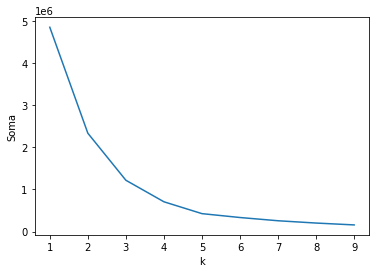

In [ ]:
plt.plot(k_list, squared_dist_sum)
plt.xlabel('k')
plt.ylabel('Soma')
plt.show()

In [ ]:
model = KMeans(n_clusters=3).fit(pd.get_dummies(df_heros_all.drop('name', axis=1)))
pred = model.labels_
clusters = model.fit_predict(pd.get_dummies(df_heros_all.drop('name', axis=1)))

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 298 samples in 0.001s...
[t-SNE] Computed neighbors for 298 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 298 / 298
[t-SNE] Mean sigma: 3.551681
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.516876
[t-SNE] KL divergence after 1000 iterations: 0.271639


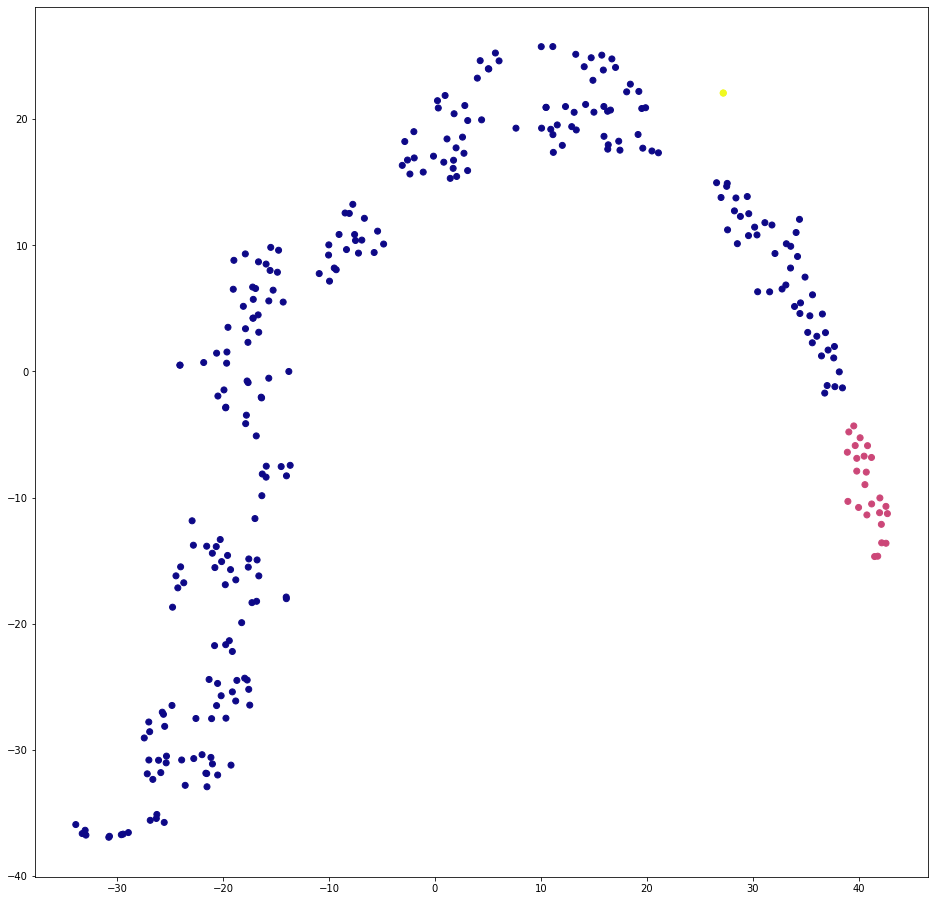

In [ ]:
np.random.seed(1)
tsne_clusters=TSNE(perplexity=15, verbose=1)
tsne_results=tsne_clusters.fit_transform(pd.get_dummies(df_heros_all.drop('name', axis=1)))
plt.figure(figsize=(16,16))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=pred, cmap='plasma')

In [ ]:
df_heros_all['Cluster'] = clusters

In [ ]:
df_heros_all.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Cluster
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,...,False,False,False,False,False,False,False,False,False,0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,...,False,False,False,False,False,False,False,False,False,1
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,...,False,False,False,False,False,False,False,False,False,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
list(df_heros_all.columns[:9])

['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Height',
 'Publisher',
 'Alignment',
 'Weight']

In [ ]:
for i in range(df_heros_all['Cluster'].nunique()):
    print("Cluster no: {}".format(i))
    
    group_members= df_heros_all[df_heros_all['Cluster']==i]
    group_members_count = df_heros_all[df_heros_all['Cluster']==i].count()[0]
    
    print("Representatives: ", end=' ')
    
    reprs_count=5
    if group_members_count < 5:
        reprs_count = group_members_count
        
    for j in range(reprs_count):
        print(group_members.iloc[j]['name'], end='; ')
    print('')
    super_powers = df_heros_all[df_heros_all['Cluster']==i].drop(['name',
 'Gender',
 'Eye color',
 'Race',
 'Hair color',
 'Height',
 'Publisher',
 'Alignment',
 'Weight', 'Cluster'],axis=1).sum().to_dict()
    super_powers = sorted(super_powers.items(), key=lambda x:x[1], reverse=True)
    
    print('Most common skills with percentage of occurance:')
    for super_power in super_powers[:10]:
      print(super_power[0] + ' --> ' + format((super_power[1]/group_members_count), '.0%'))
    print('##############################################################################')

Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis
para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer
pré-processamento e engenharia de recursos que você aplicou no processo.

1. Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
2. Como as características específicas deste conjunto de dados influenciam suas escolhas e
resultados de modelagem?
3. Como você avalia os resultados?

In [ ]:
df_heros_compact_NB = df_heros_all.loc[:, df_heros_all.columns.isin(['name','Gender','Height','Weight','Alignment'])]
df_heros_compact_NB.describe()

,Height,Weight
count,298.000000,298.000000
mean,188.564430,116.359060
std,66.651713,108.903141
min,15.200000,14.000000
25%,175.000000,63.000000
50%,183.000000,83.000000
75%,191.000000,108.000000
max,975.000000,855.000000


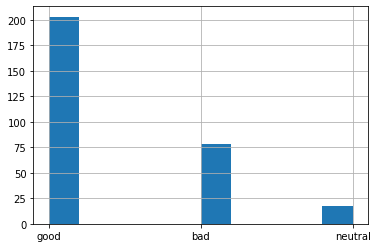

In [ ]:
df_heros_compact_NB.Alignment.hist()

In [ ]:
sns.distplot(df_heros_compact_NB.Height, fit = stats.norm);

In [ ]:
sns.distplot(df_heros_compact_NB.Weight, fit = stats.norm);

In [ ]:
sns.boxplot(data = df_heros_compact_NB, orient = "v")

In [ ]:
X = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Weight'])]
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [ ]:
gnb = GaussianNB()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
resultado = cross_val_score(gnb, X, df_heros_compact_NB.Alignment, cv = kfold)
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 68.816


In [ ]:
oversample = imblearn.over_sampling.SMOTE()
X_res, y_res = oversample.fit_resample(df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Weight'])], df_heros_compact_NB.Alignment )

In [ ]:
gnb = GaussianNB()
kfold = KFold(n_splits = 10, shuffle=True, random_state=1 )
resultado = cross_val_score(gnb, X_res, y_res, cv = kfold, scoring = 'accuracy')
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 40.402


Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado
para essa tarefa.

1. O que motivou sua escolha do algoritmo?
2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da
modelagem?

In [ ]:
num_folds = 10
resultados = []
nomes = []
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RNN',MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)))

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle=True, random_state=1)
    cv_results = cross_val_score(modelo, X_res, y_res, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Além do bem e do mal

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

Qual algoritmo você escolheu e por quê? 
Como você avalia o desempenho do seu algoritmo neste caso? 

In [ ]:
Male = 0
Female = 1
df_heros_compact_NB['Gender'].replace('Male', Male, inplace=True)
df_heros_compact_NB['Gender'].replace('Female', Female, inplace=True)

X = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Height','Gender'])]
Y = df_heros_compact_NB.loc[:, df_heros_compact_NB.columns.isin(['Weight'])]


In [ ]:
modelo2 = sm.OLS(Y,X).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              179.0
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                    1.13e-51
Time:                        03:03:35   Log-Likelihood:                         -1815.7
No. Observations:                 298   AIC:                                      3635.
Df Residuals:                     296   BIC:                                      3643.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender       -33.6604     13.451     -2.502      0.013     -60.132      -7.189
Height         0.6232      0.035     17.880      0.000       0.555       0.692
==============================================================================
Omnibus:                      171.776   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3624.173
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                      19.667   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se você gostou de brincar com o conjunto de dados de super-heróis, esta seção é para você
mostrar quaisquer outros aspectos dos dados que não exploramos nas perguntas. Como uma
seção de bônus, isso é totalmente opcional, mas adoraríamos ver os insights que você pode
obter desses dados.

In [97]:
profile = ProfileReport(df_heros_all, title = "Relatório", html = {"style":{"full_width": True}})
profile.to_file(output_file = "/content/Relatório Base de Dados HTML")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]